# 3.8 多层感知机

多层感知机（Multilayer Perceptron, MLP）是一种前馈神经网络，由多个感知机层组成。每一层的输出作为下一层的输入，通过非线性激活函数实现复杂的映射关系。如果没有隐藏层的激活函数，整个网络将退化为线性模型。
### 多层感知机的结构
多层感知机通常包含以下几部分：
- **输入层**：接收输入数据。
- **隐藏层**：一个或多个隐藏层，每层包含若干神经元，负责提取特征和进行非线性变换。
- **输出层**：生成最终的预测结果。

## 激活函数

In [19]:
import torch
import matplotlib.pyplot as plt

def plot_act(activation_func):
    x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
    y = activation_func(x)
    
    y.backward(torch.ones_like(x))
    
    _, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].plot(x.detach().numpy(), y.detach().numpy(), label='ReLU')
    axes[0].set_title('ReLU Activation Function')
    axes[0].set_xlabel('Input')
    axes[0].set_ylabel('Output')
    axes[0].axhline(0, color='black', lw=0.5, ls='--')
    axes[0].axvline(0, color='black', lw=0.5, ls='--')
    axes[0].grid()
    axes[0].legend()

    axes[1].plot(x.detach().numpy(), x.grad.detach().numpy(), label='Gradient', color='orange')
    axes[1].set_title('Gradient of ReLU')
    axes[1].set_xlabel('Input')
    axes[1].set_ylabel('Gradient')
    axes[1].axhline(0, color='black', lw=0.5, ls='--')
    axes[1].axvline(0, color='black', lw=0.5, ls='--')
    axes[1].grid()
    axes[1].legend()

    plt.tight_layout()
    plt.show()

### ReLU函数
ReLU（Rectified Linear Unit）函数定义为：$f(x) = \max(0, x)$。它在正区间内线性增长，在负区间内输出为零。通俗地说，ReLU函数会将所有负值截断为零，而正值保持不变。这种非线性特性使得神经网络能够学习复杂的模式。使用ReLU函数的原因是， 它的求导表现特别好：要么让参数消失，要么让参数通过，这有助于缓解梯度消失问题，从而加速神经网络的训练过程。

### ReLU函数求导
ReLU函数的导数定义为：
$$
f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0 
\end{cases}
$$
这意味着在正区间内，ReLU函数的斜率为1，而在负区间内，斜率为0。（注意：在x=0处，ReLU函数的导数是未定义的，但在实际应用中通常将其设为0或1。）

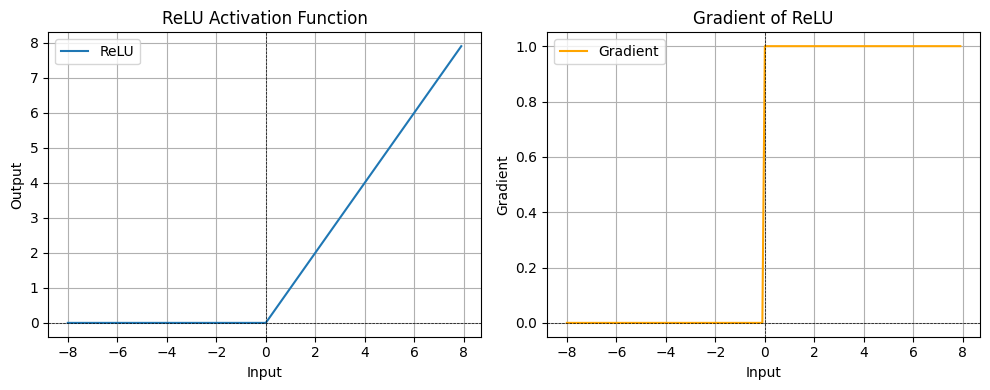

In [20]:
plot_act(torch.relu)

### Sigmoid函数

对于一个定义域在$\mathbb{R}$上的输入，Sigmoid函数将其映射到(0, 1)区间，公式如下：
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

### Sigmoid函数求导
Sigmoid函数的导数可以通过以下公式计算：
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$
当输入为0时，Sigmoid函数的输出为0.5，此时导数达到最大值0.25。随着输入绝对值的增大，Sigmoid函数的输出趋近于0或1，导数趋近于0。

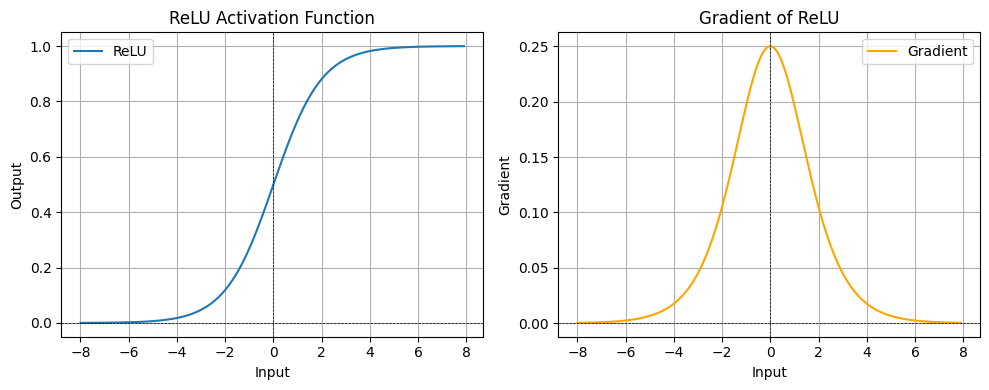

In [21]:
plot_act(torch.sigmoid)

### tanh函数

tanh函数（双曲正切函数）将输入映射到(-1, 1)区间，公式如下：
$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
和Sigmoid函数类似，tanh函数也是一种S型曲线，但它的输出范围是关于坐标系原点中心对称的，这使得它在某些情况下比Sigmoid函数表现更好。
### tanh函数求导
tanh函数的导数可以通过以下公式计算：
$$
\tanh'(x) = 1 - \tanh^2(x)
$$
当输入为0时，tanh函数的输出为0，此时导数达到最大值1。随着输入绝对值的增大，tanh函数的输出趋近于-1或1，导数趋近于0。

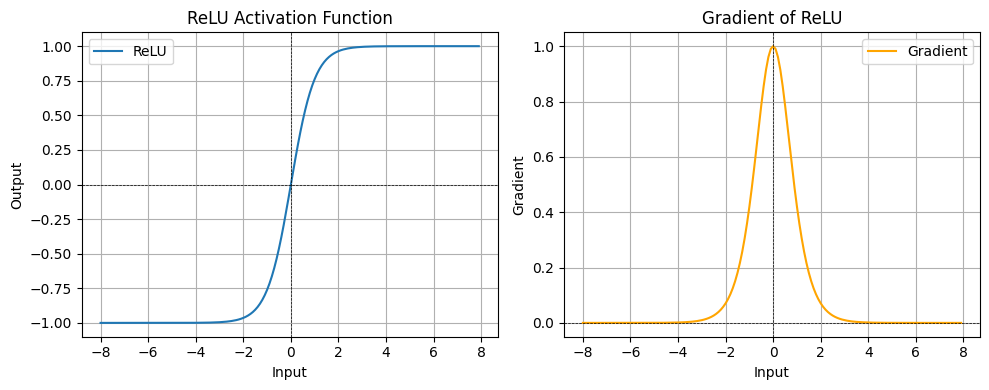

In [22]:
plot_act(torch.tanh)